- https://facebook.github.io/prophet/docs/quick_start.html#python-api
- http://datalove.hatenadiary.jp/entry/python/prophet/getting-started-with-facebook-machine-learning-library-for-time-series-analysis
- https://www.slideshare.net/hoxo_m/prophet-facebook-76285278
- https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-prophet-in-python-3

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from fbprophet import Prophet
from numpy.random import *
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import pandas as pd
import math
import pickle
import time
import datetime
import json
import itertools
import collections
import os

In [2]:
day=26
ex_1 = "coincheck"
ex_2 = "quoine"

In [3]:
def create_spread_df():
    # global dt_now
    dt_now = datetime.datetime.now()
    last_update_min = 0
    # フォルダ作成
    # global output_folder_name
    input_folder_name = "./simulation_data/"
    output_folder_name = "./model_output/"

    if not os.path.exists(output_folder_name):
        os.makedirs(output_folder_name)


    # データ読み取り
    data_json_all = {}
    for day in [14,15,16,17,19,20,21,22,23,24,25,26,27,28]:
        with open(input_folder_name+"2017-"+str(dt_now.month)+"-"+str(day)+"ticker_log.json") as data_file:
            data_json = json.load(data_file)

        data_json_all = dict(data_json_all, **data_json)

    ticker_all = collections.OrderedDict(sorted(data_json_all.items()))
#     with open(input_folder_name+"2017-10-"+str(day)+"ticker_log.json") as data_file:
#         data_json = json.load(data_file)
#         ticker_log = collections.OrderedDict(sorted(data_json.items()))
    period_hour = 3
    spread_a_list = []
    spread_b_list = []
    # dt_now = datetime.datetime.now()
#     tstr = '2017-10-26 16:00:00'
#     dt= datetime.datetime.strptime(tstr, '%Y-%m-%d %H:%M:%S')

    for key, ticker in ticker_all.items():
        spread_a = ticker[ex_1]["bid"] - ticker[ex_2]["ask"]
        spread_b = ticker[ex_2]["bid"] - ticker[ex_1]["ask"]
        spread_a_list.append(spread_a)
        spread_b_list.append(spread_b)

    df_spread=pd.DataFrame(index=list(ticker_all.keys()))

    df_spread[ex_1+"_bid-"+ex_2+"_ask"] = pd.DataFrame(spread_a_list, index=list(ticker_all.keys()))
    df_spread[ex_2+"_bid-"+ex_1+"_ask"] = pd.DataFrame(spread_b_list, index=list(ticker_all.keys()))

    df_spread['date']=df_spread.index
    df_spread['date']=pd.to_datetime(df_spread['date'], format='%Y-%m-%d-%H:%M:%S')
    return df_spread

df_spread = create_spread_df()

In [13]:
df=pd.DataFrame(index=df_spread.index)
df["y"]=df_spread[["coincheck_bid-quoine_ask"]]
df["ds"]=df_spread.index

In [14]:
df=df[(df['y']>-6000) & (df['y']<6000)]

In [15]:
# Python
# df = pd.read_csv('example_wp_peyton_manning.csv')

In [16]:
df.head()

,y,ds
2017-10-14-07:54:40,118.74,2017-10-14-07:54:40
2017-10-14-07:54:43,120.00,2017-10-14-07:54:43
2017-10-14-07:54:46,604.53,2017-10-14-07:54:46
2017-10-14-07:54:49,604.52,2017-10-14-07:54:49
2017-10-14-07:54:53,434.00,2017-10-14-07:54:53


In [17]:
df.tail()

,y,ds
2017-10-28-23:54:43,-1693.99000,2017-10-28-23:54:43
2017-10-28-23:54:44,-1516.99000,2017-10-28-23:54:44
2017-10-28-23:54:45,-1514.16085,2017-10-28-23:54:45
2017-10-28-23:54:46,-1514.15000,2017-10-28-23:54:46
2017-10-28-23:54:48,-1513.00000,2017-10-28-23:54:48


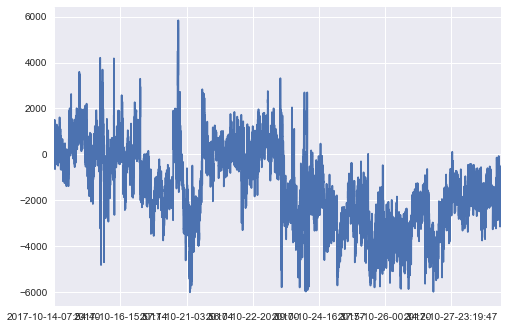

In [18]:
df["y"].plot()

In [10]:
# 対数変換(値が大きくなるとばらつきも大きくなることの対処)
# df['y'] = np.log(df['y'])
# df.head()

/Users/take/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/Users/take/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


,y,ds
2017-10-14-07:54:40,4.776936,2017-10-14-07:54:40
2017-10-14-07:54:43,4.787492,2017-10-14-07:54:43
2017-10-14-07:54:46,6.404451,2017-10-14-07:54:46
2017-10-14-07:54:49,6.404435,2017-10-14-07:54:49
2017-10-14-07:54:53,6.073045,2017-10-14-07:54:53


In [19]:
m = Prophet()
m.fit(df)

In [31]:
# periodは予測期間
future = m.make_future_dataframe(periods=60*24*1, freq = 'min')
future.tail()

,ds
68999,2017-10-29 23:50:48
69000,2017-10-29 23:51:48
69001,2017-10-29 23:52:48
69002,2017-10-29 23:53:48
69003,2017-10-29 23:54:48


In [32]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
68999,2017-10-29 23:50:48,-3444.895514,-6756.550300,-892.399941
69000,2017-10-29 23:51:48,-3442.912864,-6477.444675,-738.059133
69001,2017-10-29 23:52:48,-3440.940659,-6574.129904,-580.121245
69002,2017-10-29 23:53:48,-3438.979518,-6719.645653,-853.423768
69003,2017-10-29 23:54:48,-3437.030062,-6606.977502,-765.830766


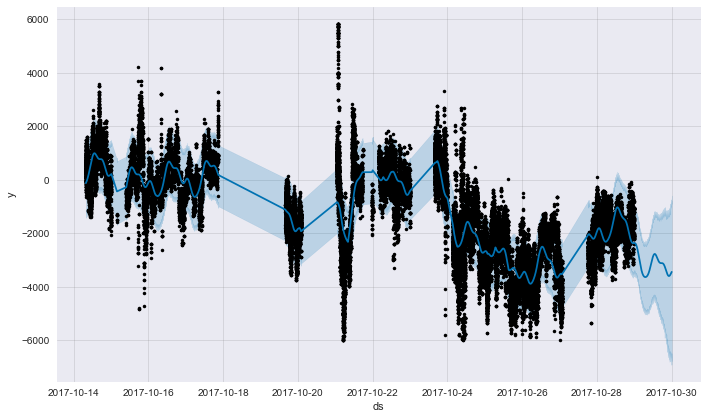

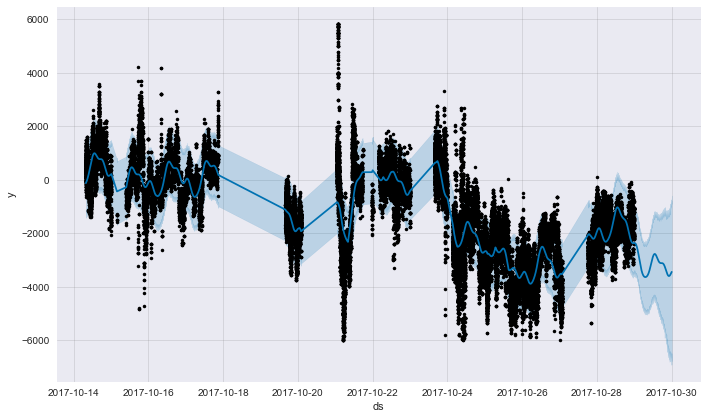

In [33]:
m.plot(forecast)

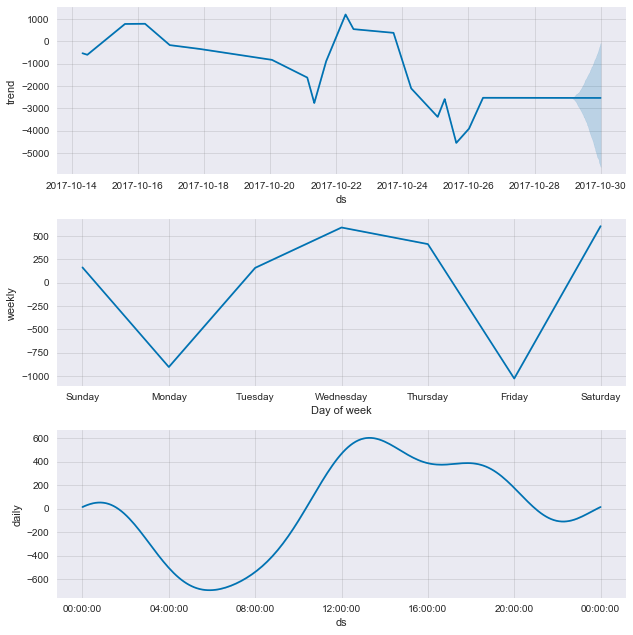

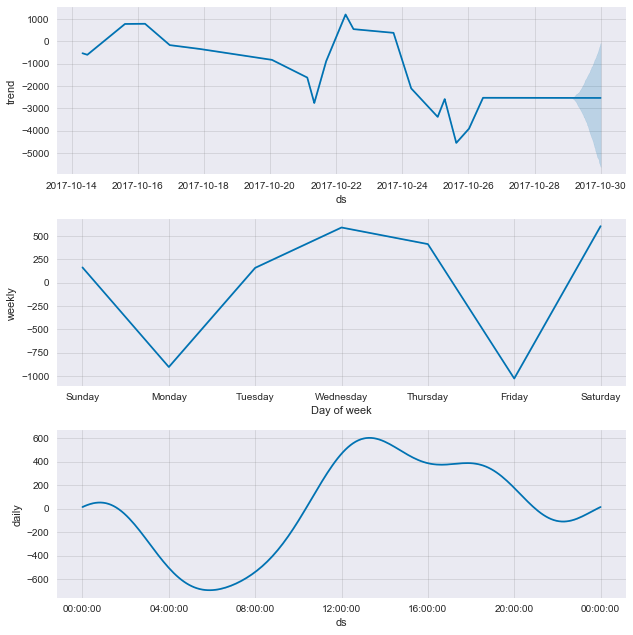

In [34]:
m.plot_components(forecast)

In [30]:
with open("./prophet_spread_model_v1.dump","wb") as f:
    pickle.dump(m, f)